# Central Limit Theorem (CLT)

The aim of this notebook is to illustrate the Central Limit Theorem (CLT) through concrete examples.

When you add random numbers from different distributions, but with similar variance (or standard deviation) together and plot the distribution of these sums, you end up with a Gaussian distribution, as dictated by the CLT. 
The example also illustrates how widths (and therefore uncertainties) are added in quadrature, as one has to divide the sum by the square root of the number of random numbers that went into the sum in order to get a Gaussian of unit width (when using random numbers of unit width, i.e. RMSE $= \sigma = 1$).


## References:
- **R. Barlow**: page 49 (and page 45 for Uniform distribution)
- **G. Cowan**: page 33
- __[Wikipedia: "Central limit theorem"](http://en.wikipedia.org/wiki/Central_limit_theorem)__

## Author(s), contact(s), and dates:
- Author: Troels C. Petersen (NBI)
- Email:  petersen@nbi.dk
- Date:   16th of November 2023

In [1]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Modules to see files and folders in directories

Here we set the random seed for the random number generator (RNG). This ensures reproducability (the same results every time the notebook is restarted). 

In [2]:
r = np.random                         # Random generator
r.seed(42)                            # Set a random seed (but a fixed one - more on that later.)

And here we set the parameters for the experiement. We are going to play around with these more later on.
For now we choose to take __10 uniform numbers__ and consider their sum __1000 times__. 

In [3]:
N_experiments = 1000                  # Number of sums produced
N_uniform     = 10                    # Number of uniform numbers used in sum
N_exponential = 10                  # Number of exponential numbers used in sum
N_cauchy      = 0                   # Number of cauchy numbers used in sum

And finally we set up some global constants and the bool flags about the program:

In [4]:
verbose = True                        # Print some numbers or not?
N_verbose = 10                        # If so, how many?
save_plots = False                    # Save the plots produced to file(s)?

## Initial functions
We load the external functions from the `External_Functions` directory. The first line adds the relevant path to the places it will go look for functions, and the second line imports the function wanted. If you get an error here, check that you have copied "External Functions" to your directory, and that you refer to the correct path.

In [5]:
sys.path.append('../../External_Functions')
from ExternalFunctions import nice_string_output, add_text_to_ax   # Useful functions to print fit results on figure

## Loop over process:

Having loaded everything that we need, we can start the actual program. We start out by initializing a counter to count how many of the produced sums that fall outside some range ($\pm 3\sigma$) and some zero-filled numpy arrays:

In [13]:
N3_sigma = 0        # Counter for the number of produced sums, that fall outside +-3 sigma

for iexp in range(N_experiments): 
    x_uniform = r.uniform(size = N_uniform)
    # Transform the generated numbers to have mean 0 and standard deviation 1
    x_uniform = (x_uniform - np.mean(x_uniform)) / np.std(x_uniform)

    x_exponential = r.exponential(size = N_exponential)
    x_exponential = (x_exponential - np.mean(x_exponential) / np.std(x_exponential))
    x_cauchy = r.standard_cauchy(size = N_cauchy)

    # Store all the x_values
    x_temp = [x_uniform, x_exponential, x_cauchy]

    # Store the sum
    x_sum = np.zeros(max(len(arr) for arr in x_temp))

    for arr in x_temp:
        x_sum[:len(arr)] += arr

    x_sum = x_sum / np.sqrt(len(x_sum))

    for i in x_sum:
        if i < -3 or i > 3:
            N3_sigma += 1

print(f'Outside +/- 3SD: {N3_sigma:1.0f}')

Outside +/- 3SD: 0


# Plotting

## Uniform Distribution

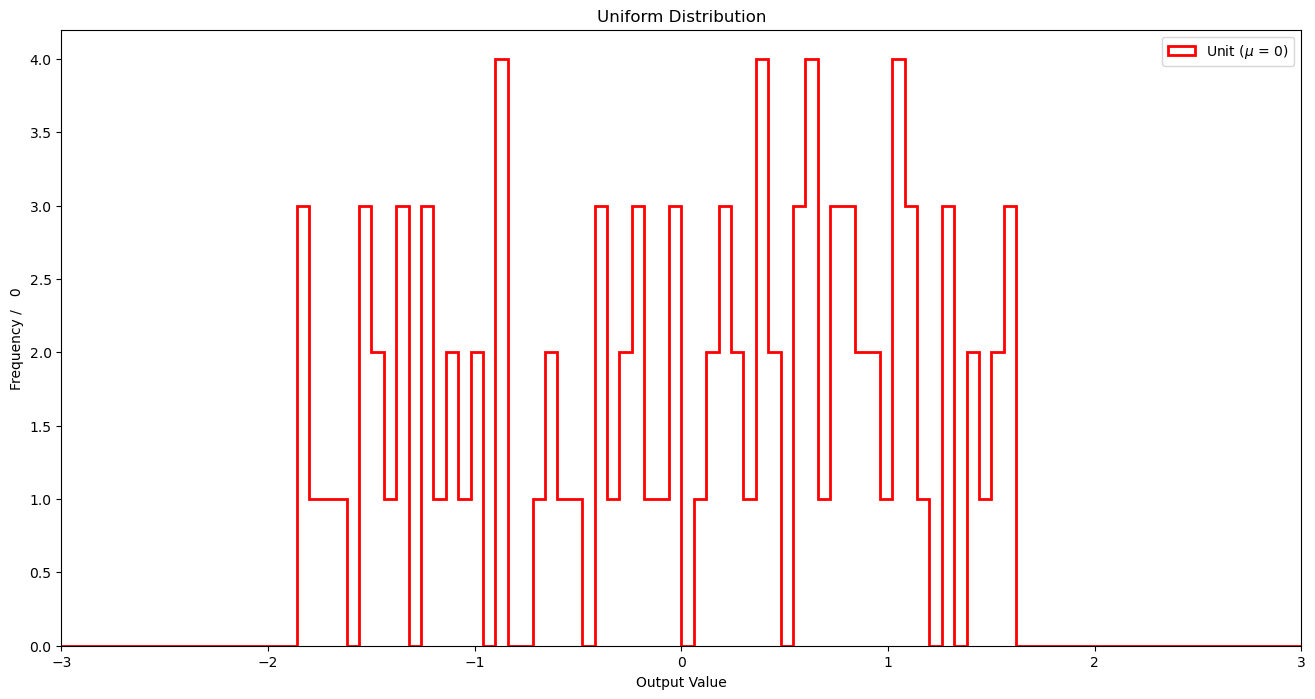

In [14]:
Nbins = 100
xmin = -3
xmax = 3
binwidth = int((xmax - xmin) / Nbins)

y, bin_edges = np.histogram(x_uniform, bins = Nbins, range = (xmin, xmax))
x = bin_edges[:-1] + np.diff(bin_edges)       # Calculate the x-values as the center of the bins.

fig, ax = plt.subplots(figsize=(16, 8))
hist1 = ax.hist(x_uniform, bins = Nbins, range = (xmin, xmax), histtype = 'step', linewidth = 2, color = 'red', label = 'Unit ($\mu$ = 0)')


ax.set(xlim = (xmin, xmax), 
       xlabel = "Output Value", 
       ylabel = f"Frequency /{binwidth:4d}",    # To put the bin width in the y-axis label 
       title = "Uniform Distribution");
ax.legend(loc = 'best'); # could also be # loc = 'upper right' e.g.

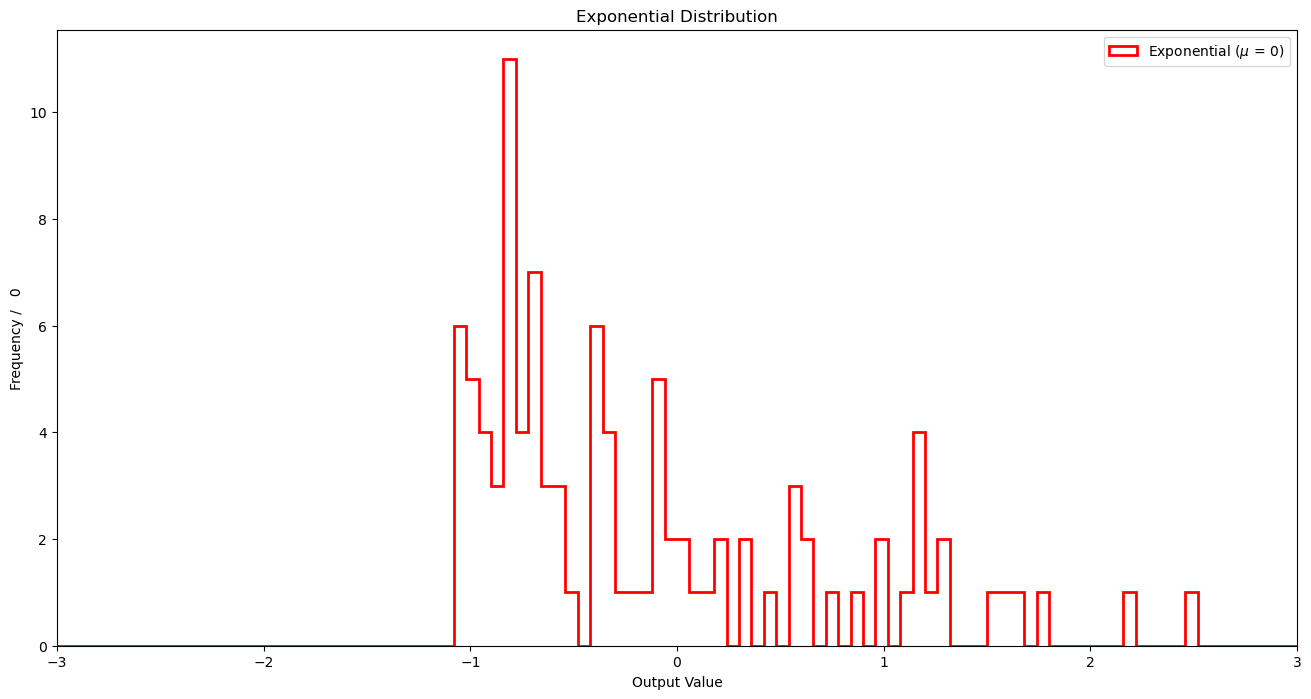

In [12]:
Nbins = 100
xmin = -3
xmax = 3
binwidth = int((xmax - xmin) / Nbins)

y, bin_edges = np.histogram(x_exponential, bins = Nbins, range = (xmin, xmax))
x = bin_edges[:-1] + np.diff(bin_edges)       # Calculate the x-values as the center of the bins.

fig, ax = plt.subplots(figsize=(16, 8))
hist1 = ax.hist(x_exponential, bins = Nbins, range = (xmin, xmax), histtype = 'step', linewidth = 2, color = 'red', label = 'Exponential ($\mu$ = 0)')


ax.set(xlim = (xmin, xmax), 
       xlabel = "Output Value", 
       ylabel = f"Frequency /{binwidth:4d}",    # To put the bin width in the y-axis label 
       title = "Exponential Distribution");
ax.legend(loc = 'best'); # could also be # loc = 'upper right' e.g.

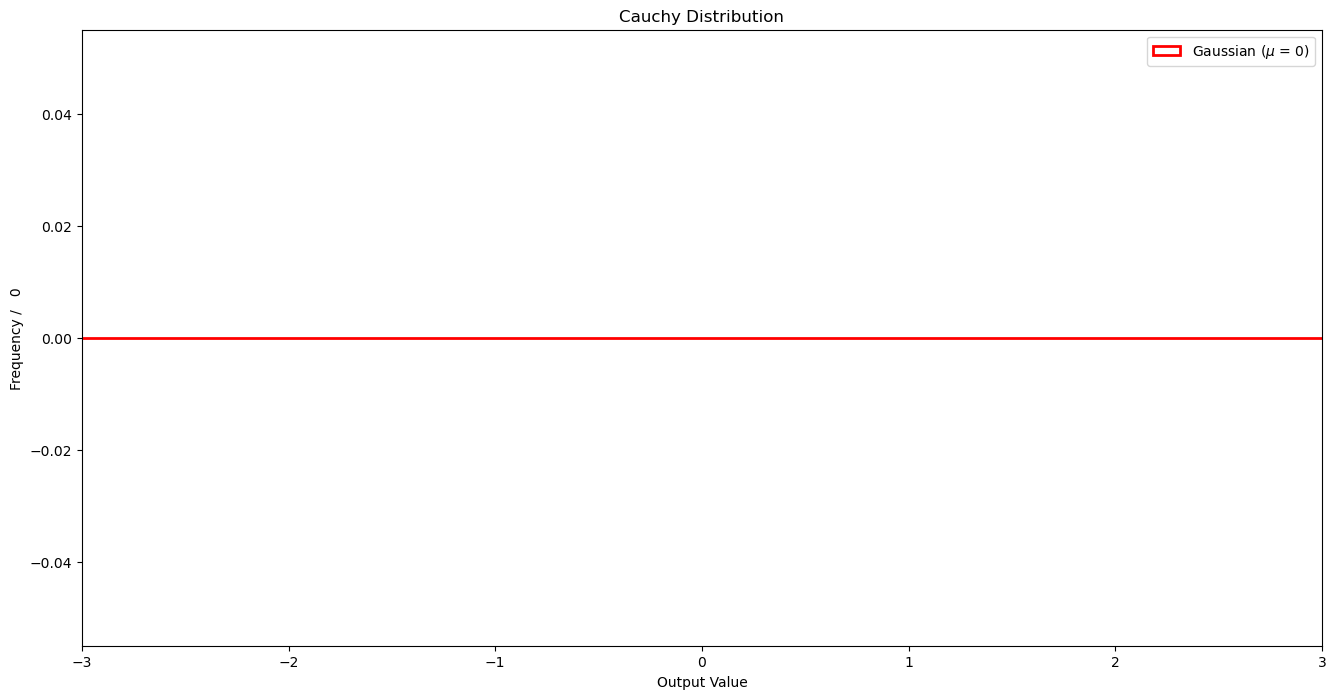

In [9]:
Nbins = 100
xmin = -3
xmax = 3
binwidth = int((xmax - xmin) / Nbins)

y, bin_edges = np.histogram(x_cauchy, bins = Nbins, range = (xmin, xmax))
x = bin_edges[:-1] + np.diff(bin_edges)       # Calculate the x-values as the center of the bins.

fig, ax = plt.subplots(figsize=(16, 8))
hist1 = ax.hist(x_cauchy, bins = Nbins, range = (xmin, xmax), histtype = 'step', linewidth = 2, color = 'red', label = 'Gaussian ($\mu$ = 0)')


ax.set(xlim = (xmin, xmax), 
       xlabel = "Output Value", 
       ylabel = f"Frequency /{binwidth:4d}",    # To put the bin width in the y-axis label 
       title = "Cauchy Distribution");
ax.legend(loc = 'best'); # could also be # loc = 'upper right' e.g.

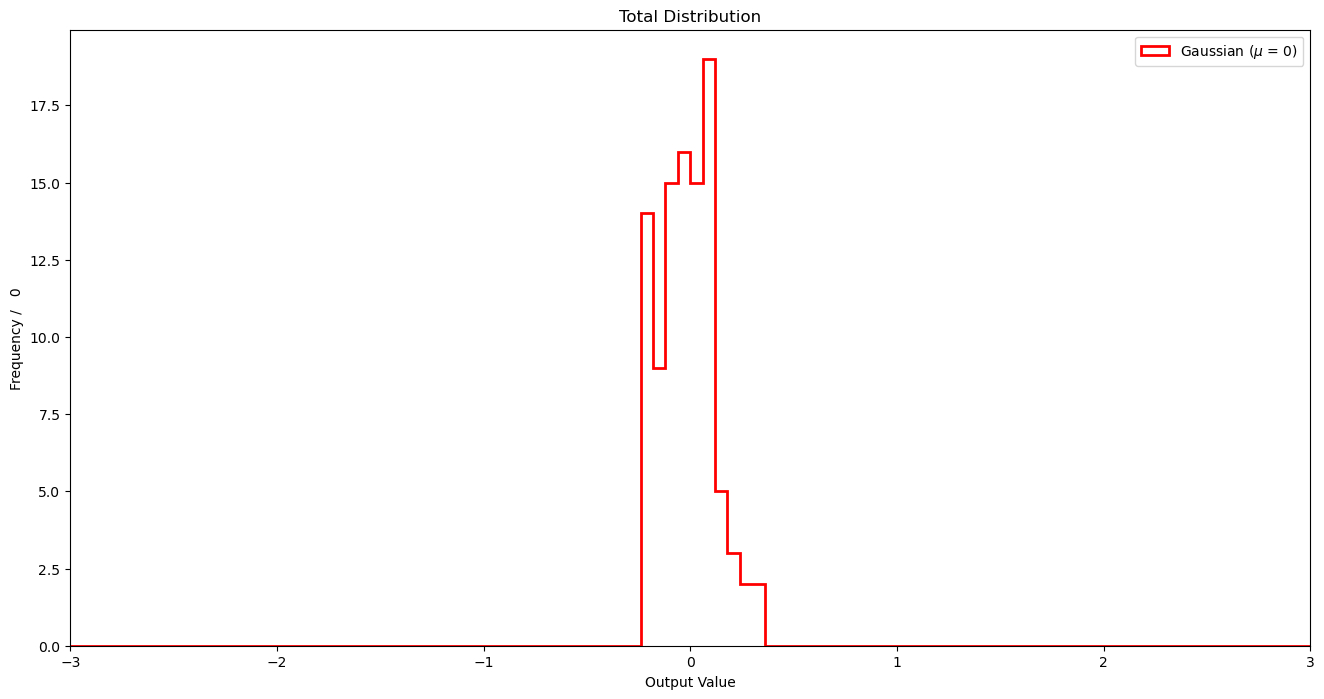

In [10]:
Nbins = 100
xmin = -3
xmax = 3
binwidth = int((xmax - xmin) / Nbins)

y, bin_edges = np.histogram(x_sum, bins = Nbins, range = (xmin, xmax))
x = bin_edges[:-1] + np.diff(bin_edges)       # Calculate the x-values as the center of the bins.

fig, ax = plt.subplots(figsize=(16, 8))
hist1 = ax.hist(x_sum, bins = Nbins, range = (xmin, xmax), histtype = 'step', linewidth = 2, color = 'red', label = 'Gaussian ($\mu$ = 0)')


ax.set(xlim = (xmin, xmax), 
       xlabel = "Output Value", 
       ylabel = f"Frequency /{binwidth:4d}",    # To put the bin width in the y-axis label 
       title = "Total Distribution");
ax.legend(loc = 'best'); # could also be # loc = 'upper right' e.g.

### Problem:

Fill the above numpy arrays with numbers according to the mentioned distributions, ensuring that the uniform and exponential have mean=0 and SD=1. Let the sum be the sum of all these numbers (possibly a mix), and consider the distribution of the sums. Do they look Gaussian?
In order to compare the distribution of sums with a UNIT Gaussian, you might want to divide the sum values by sqrt(N), where N is the number of input values. As a part of checking, count how many values are outside 3 sigma.

## Draw the input distributions:

It is always important to visualize out data to see if our code produced the expected results, find outliers and just generally get a better understand of it.

We first define the number of bins and the ranges of the different distributions. Note that it is important to think about this - too many/few bins or poor choice of range may ruin the plot, and one should try to get a "regular" bin widths:

***
***

First make sure that you understand what the Central Limit Theorem (CLT) states! Then, acquaint yourself with the program. Make sure that you read through it, as many
of these features will be used onwards. Do you understand why the uniform distribution needs to go from $\pm \sqrt 3$ in order to give a distribution with a width of $1$ (i.e. unit) and why you subtract $1$ from the exponential distribution (and how this works at all)?

# Questions:

1. What is the mean and RMS of the input distributions?

2. Why would one want to put a factor $\frac{1}{\sqrt N}$ when summing up the various contributions to sum?
    Hint: Assume that I always wanted to compare the distribution of sums with a UNIT Gaussian.

3. Using a sum of 10 uniform random numbers with mean 0 and width 1, what is the expected 
    width of the resulting distribution according to CLT? What is the probability of
    obtaining a number beyond 3 sigma, i.e. how many numbers did you get beyond 3 sigma?
    What would you expect from a true Gaussian distribution?
    And what about the same question for 3.5 sigma? And 4.0 sigma?
    Put additional counters into the code, to test any effects in the tails (which have little statistics as it is).
    Increase the number of experiments run to (much) more than 1000...

4. Now try to add 10 exponential (i.e. set `N_exponential=10` and rerun the program). Does that give something Gaussian? What about 1000?
    Then try to add 10 cauchy numbers (i.e. set `N_cauchy=10` and rerun the program). Does that give something Gaussian? What about 1000?
    If not Gaussian, why do the Cauchy distribution "ruin" the Gaussian distribution?
    And is this in conflict with the Central Limit Theorem?


### Advanced questions:

5. If one used a trunkated mean throwing away the top and bottom e.g. 10%,
    will the truncated mean of 1000 Cauchy numbers then converge to a Gaussian (possibly not with unit width)?

6. What is the lowest number of uniform random numbers needs to be added, before the probability
    for the sum to follow a Gaussian distribution is greater than 1% (on average)
    when considering 1000 sums (i.e. `N_experiments=1000`)? Here, a $\chi^2$ fit is needed.

# Learning points:

The exercises should make you:
1. Understand why the Gaussian distribution is central in statistics (since all combinations of distributions converge towards it).
2. Give you a feel for how "fast" this convergence is (i.e. relatively fast for "nice" distributions).
3. Give you confidence in why we consider uncertainties Gaussian, unless known to be otherwise.

Including the Cauchy distribution was simply to make you think about how the Central Limit Theorem is stated!